# Introdução


O objetivo é identificar e apresentar resultados detalhados a partir da investigação de hiperparâmetros para modelos MLP, visando melhor classificar a base de diabetes fornecida.

## Sobre o conjunto de dados

Este conjunto de dados é originário do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo do conjunto de dados é prever, de forma diagnóstica, se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto. Várias restrições foram aplicadas na seleção dessas instâncias a partir de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de origem indígena Pima.

O conjunto de dados consiste em várias variáveis preditoras médicas e uma variável alvo, chamada *Outcome* (Resultado). As variáveis preditoras incluem o número de gestações da paciente, seu IMC, nível de insulina, idade, entre outros.

Para cada atributo (todos com valores numéricos):

- Número de vezes grávida
- Concentração de glicose no plasma 2 horas após um teste oral de tolerância à glicose
- Pressão arterial diastólica (mm Hg)
- Espessura da prega cutânea do tríceps (mm)
- Insulina sérica em 2 horas (mu U/ml)
- Índice de massa corporal (peso em kg / (altura em m)^2)
- Função de histórico familiar de diabetes (*diabetes pedigree function*)
- Idade (anos)
- Variável de classe (0 ou 1)
- Valores ausentes em atributos: Sim
- Distribuição das classes: (valor de classe 1 é interpretado como "teste positivo para diabetes")


Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score, make_scorer

# 1. Análise exploratória

## 1.1. Visão Geral

Aqui irei somente carregar os dados, adicionar os nomes das colunas e ter um panorama geral dos dados.

In [212]:
df = pd.read_csv('pima.csv', sep=';')
df.columns = [
    'pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
    'bmi', 'diabetes_pedigree_function', 'age', 'diabetes'
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     767 non-null    int64  
 2   blood_pressure              767 non-null    int64  
 3   skin_thickness              767 non-null    int64  
 4   insulin                     767 non-null    int64  
 5   bmi                         767 non-null    float64
 6   diabetes_pedigree_function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   diabetes                    767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Apesar de não aparecer valores faltantes, a descrição dos dados mostra que existem valores faltantes, mas eles estão representados por zeros. Irei tratar disso mais adiante.

## 1.2. Distribuição

Um ponto interessante a se observar é a distribuição dos dados. Abaixo, pode-se perceber que a base está desbalanceada e que a maioria dos dados está concentrada na classe negativa (0), i.e., sem diabetes.

Ponto este a ser considerado no tratamento de valores faltantes e no treinamento do modelo.

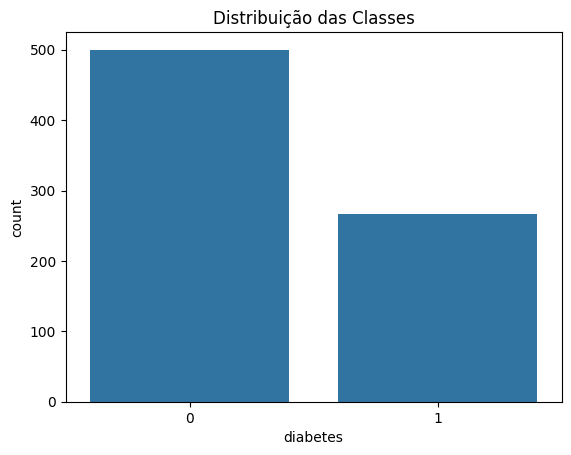

In [213]:
sns.countplot(x='diabetes', data=df)
plt.title("Distribuição das Classes")
plt.show()

# 2. Treinamento e avaliação sem tratamento dos dados

## 2.1. Divisão dos dados, escala e separação de treino e teste

In [214]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 2.2. Treinamento do modelo padrão

Relatório de Classificação:

recall: 0.50
accuracy: 0.71


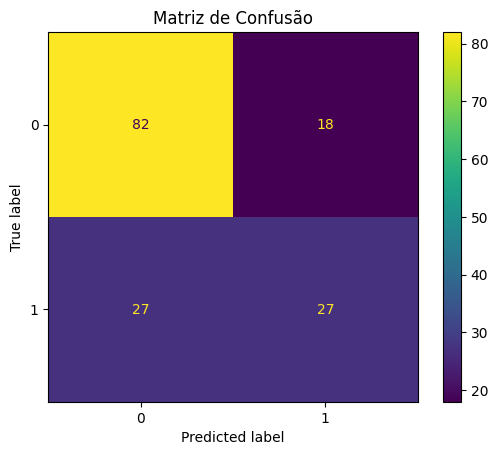

In [215]:
def report(mlp, X_test, y_test, y_pred):
    rec = recall_score(y_test, y_pred, pos_label=1)
    acc = accuracy_score(y_test, y_pred)

    print("Relatório de Classificação:\n")
    print(f'recall: {rec:.2f}')
    print(f'accuracy: {acc:.2f}')

    ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
    plt.title("Matriz de Confusão")
    plt.show()

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

report(mlp, X_test, y_test, y_pred)

A métrica principal que irei utilizar para avaliar o modelo é o recall, pois é mais importante para mim dizer que uma pessoa tem diabetes quando ela não tem e com isso a pessoa pode se prevenir.

Dizer que eela não tem, quando tiver é que é o perigo, pois a pessoa pode não se prevenir e ter complicações.

Nesse caso, o recall está em $50\%$ e a acurácia em $71\%$. Acredito que de para melhorar os hiperparâmetros do modelo para melhorar o desempenho.

Tratar os dados também é de suma importância, mas isso será feito mais afrente.

## 2.2. Treinamento com busca de hiperparâmetros

/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera


Melhores Parâmetros Encontrados:
{'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'max_iter': 512}
Relatório de Classificação:

recall: 0.57
accuracy: 0.71


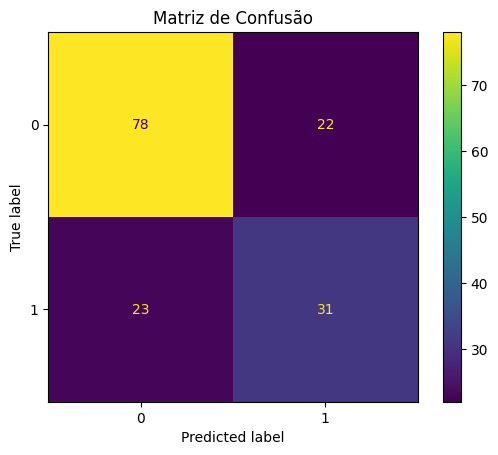

In [216]:
param_grid = {
    'hidden_layer_sizes': [(16,), (64,), (128,), (64, 64), (128, 64), (128, 128)],
    'alpha': [0.0001, 0.001],
    'max_iter': [512, 1024]
}

scorer = make_scorer(recall_score, pos_label=1)

grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=scorer,
    verbose=0,
    n_jobs=-1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("\nMelhores Parâmetros Encontrados:")
print(grid.best_params_)

report(grid.best_estimator_, X_test, y_test, y_pred)

Pode-se ver que o recall melhorou de $50\%$ para $57\%$ e a acurácia permaneceu em $71\%$.

Temos um avanço, mas acredito que ainda é possível melhorar mais com o tratamento dos dados.

# 3. Dado os faltantes e distribuicao desbalanceada

Preenchendo os valores faltantes com a média de forma balanceada, ou seja, a média dos valores de cada classe para cada coluna com valores faltantes.

In [217]:
# Substituir zeros por NaN em colunas onde zero não faz sentido
cols_with_missing = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
df_with_missing = df.copy()
df_with_missing[cols_with_missing] = df_with_missing[cols_with_missing].replace(0, np.nan)
df_with_missing.info()

def fill_missing_balanced(df, col):
    df_copy = df.copy()

    diabetes_mean = df_copy[df_copy['diabetes'] == 1][col].mean()
    non_diabetes_mean = df_copy[df_copy['diabetes'] == 0][col].mean()

    filter_diabetes = (df_copy[col].isnull()) & (df_copy['diabetes'] == 1)
    filter_non_diabetes = (df_copy[col].isnull()) & (df_copy['diabetes'] == 0)

    df_copy.loc[filter_diabetes, col] = diabetes_mean
    df_copy.loc[filter_non_diabetes, col] = non_diabetes_mean
    
    return df_copy

df_filled = fill_missing_balanced(df_with_missing, 'glucose')
df_filled = fill_missing_balanced(df_filled, 'blood_pressure')
df_filled = fill_missing_balanced(df_filled, 'skin_thickness')
df_filled = fill_missing_balanced(df_filled, 'insulin')
df_filled = fill_missing_balanced(df_filled, 'bmi')
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     762 non-null    float64
 2   blood_pressure              732 non-null    float64
 3   skin_thickness              540 non-null    float64
 4   insulin                     394 non-null    float64
 5   bmi                         756 non-null    float64
 6   diabetes_pedigree_function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   diabetes                    767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  


# 4. Treinamento e avaliação após o tratamento

In [218]:
X = df_filled.drop('diabetes', axis=1)
y = df_filled['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 4.1. Treinamento do modelo padrão

Relatório de Classificação:

recall: 0.67
accuracy: 0.77


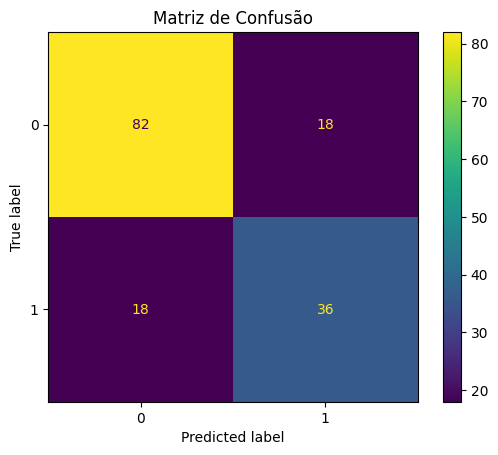

In [219]:

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

report(mlp, X_test, y_test, y_pred)

Apenas com o tratamento dos dados, em comparação com o primeiro modelo (sem melhoria dos hiperparâmetros), o recall melhorou de $50\%$ para $67\%$ e a acurácia melhorou de $71\%$ para $77\%$.

Uma melhora de $17\%$ no recall e de $6\%$ na acurácia. Um avanço bem significativo.

## 4.2. Treinamento com busca de hiperparâmetros

/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera


Melhores Parâmetros Encontrados:
{'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'max_iter': 512}
Relatório de Classificação:

recall: 0.74
accuracy: 0.79


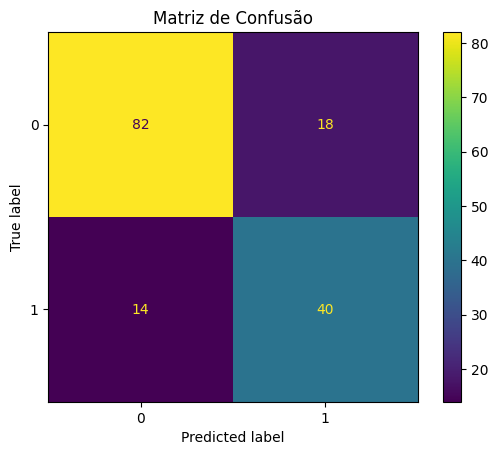

In [220]:
param_grid = {
    'hidden_layer_sizes': [(16,), (64,), (128,), (64, 64), (128, 64), (128, 128)],
    'alpha': [0.0001, 0.001],
    'max_iter': [512, 1024]
}

grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)

grid.fit(X_train, y_train)
y_best = grid.predict(X_test)

print("\nMelhores Parâmetros Encontrados:")
print(grid.best_params_)

report(grid.best_estimator_, X_test, y_test, y_best)

In [224]:
pd.DataFrame({
    'modelo': ['padrão s/ tratamento', 'após tratamento e s/ "finetunning"', 'após tratamento e c/ "finetunning"'],
    'recall': ['57%', '67%', '74%'],
    'accuracy': ['71%', '77%', '79%']
})

,modelo,recall,accuracy
0,padrão s/ tratamento,57%,71%
1,"após tratamento e s/ ""finetunning""",67%,77%
2,"após tratamento e c/ ""finetunning""",74%,79%


Por último, o modelo após o tratamento e a busca de hiperparâmetros teve uma melhora significativa se comparada com o mdelo padrão sem tratamento e com o modelo após o tratamento e sem a busca de hiperparâmetros, tanto no recall quanto na acurácia.